# CNN-based Handwritten Digit Recognition  
Partially code by [karbon](https://github.com/csy-tvgo), based on [TensorFlow Tutorial: Basic classification](https://tensorflow.google.cn/tutorials/keras/classification?hl=zh-cn) and [MNIST CNN - Keras Documentation](https://keras.io/examples/mnist_cnn/).

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)

1.15.0


## Import MNIST dataset

This guide uses the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset which contains 70,000 grayscale images in 10 categories. MNIST stands for Mixed National Institute of Standards and Technology database.  
The MNIST dataset is often used as the "Hello, World" of machine learning programs for computer vision. It contains images of handwritten digits (0, 1, 2, etc.).  
Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access MNIST directly from TensorFlow. Import and load MNIST data directly from TensorFlow:

In [6]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# grayscale image has only 1 channal
if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
    test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [3]:
train_images.shape   

(60000, 28, 28, 1)

Likewise, there are 60,000 labels in the training set:

In [4]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [6]:
test_images.shape

(10000, 28, 28, 1)

And the test set contains 10,000 images labels:

In [7]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

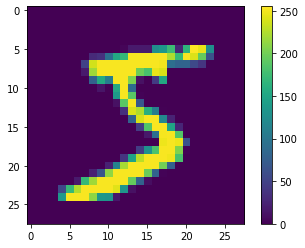

In [25]:
plt.figure()
plt.imshow(train_images[0,:,:,0])
plt.colorbar()
plt.grid(False)    # 不显示背景网格线
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way.  
In addition, encode labels using one-hot encoding.

In [16]:
train_images_normed = train_images / 255.0

test_images_normed = test_images / 255.0     # 将数组的每个像素值÷255 以减少运算量

train_labels_onehot = keras.utils.to_categorical(train_labels, 10)  # 1-->[1,0,0,0,0,0,0,0,0,0]  2-->[0,1,0,0,0,0,0,0,0,0]

test_labels_onehot = keras.utils.to_categorical(test_labels, 10)

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

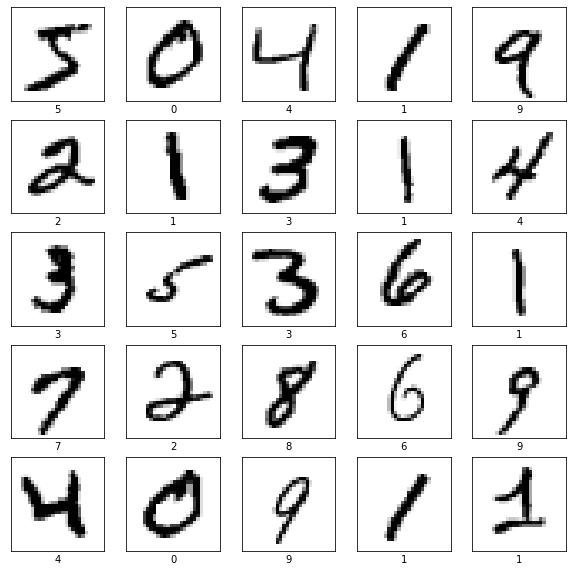

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])    # y轴刻度 此处目的是不显示刻度
    plt.grid(False)
    plt.imshow(train_images[i,:,:,0], cmap=plt.cm.binary) # cmap: colormap，binary的目的是让显示的图像是白底黑字（只有黑白两种颜色）
    plt.xlabel(train_labels[i])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.  
This example is [LeNet-5](http://yann.lecun.com/exdb/lenet/), you can modify the model as you like.

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(6, kernel_size=(5, 5),   # 卷积窗口的形状为5*5   kernel: 卷积核
                 activation='relu',
                 input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Observe the summary.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

Define the process you train the model.

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

## Train the model

### Feed the model  

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [14]:
model.fit(train_images_normed, train_labels_onehot, batch_size=100, epochs=6)
# It may need more than one minute

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 19s 320us/sample - loss: 0.3169 - acc: 0.9043
Epoch 2/6
60000/60000 [==============================] - 19s 318us/sample - loss: 0.0831 - acc: 0.9740
Epoch 3/6
60000/60000 [==============================] - 20s 328us/sample - loss: 0.0596 - acc: 0.9815
Epoch 4/6
60000/60000 [==============================] - 19s 308us/sample - loss: 0.0466 - acc: 0.9850
Epoch 5/6
60000/60000 [==============================] - 20s 325us/sample - loss: 0.0394 - acc: 0.9878
Epoch 6/6
60000/60000 [==============================] - 17s 276us/sample - loss: 0.0334 - acc: 0.9892


As the model trains, the loss and accuracy metrics are displayed. 

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [15]:
test_loss, test_acc = model.evaluate(test_images_normed, test_labels_onehot, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 2s - loss: 0.0378 - acc: 0.9879

Test accuracy: 0.9879


### Make predictions

In [16]:
predictions = model.predict(test_images_normed)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [17]:
predictions[0]

array([1.5461237e-07, 1.8591138e-07, 1.2441610e-06, 7.4584659e-07,
       9.3565589e-08, 6.6424263e-07, 1.8083064e-13, 9.9999392e-01,
       4.5548163e-08, 3.0240740e-06], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [18]:
np.argmax(predictions[0])

7

So, the model is most confident that this image is 7. Examining the test label shows that this classification is correct:

In [19]:
test_labels[0]

7

Graph this to look at the full set of 10 class predictions.

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i,:,:,0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Pred:{} {:2.0f}% (GT:{})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

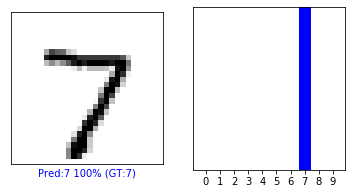

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

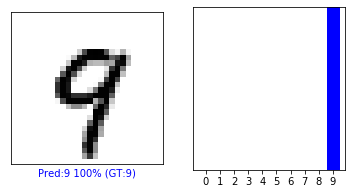

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

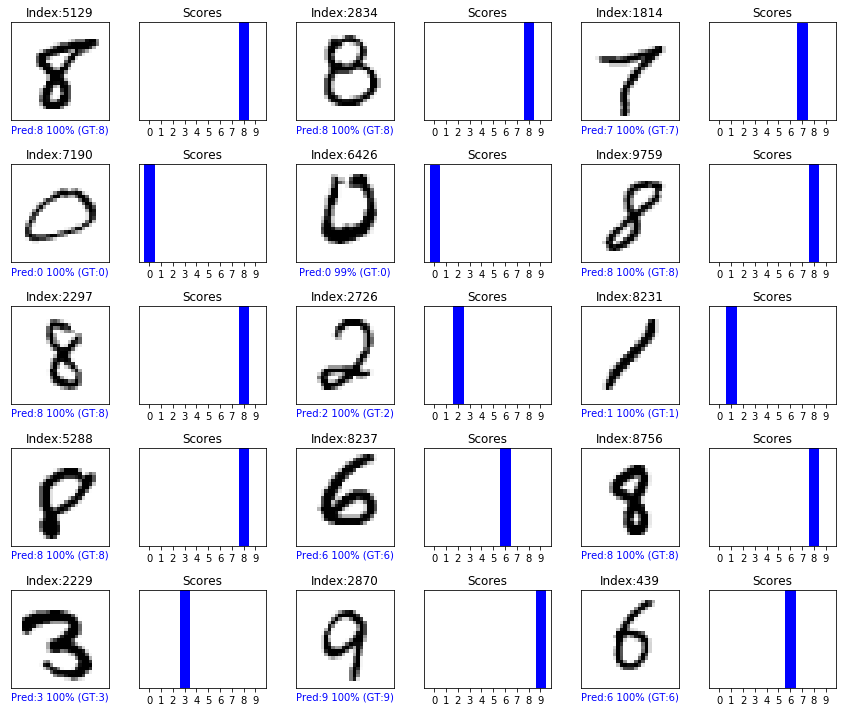

In [23]:
# Plot random 25 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
h = set()
while(len(h)<25):
    h.add(random.randint(0, 9999))
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
i = 0
for p in h:
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(p, predictions[p], test_labels, test_images)
    plt.title("Index:{}".format(p))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(p, predictions[p], test_labels)
    plt.title("Scores")
    i = i + 1
    if i >= 15:
        break
plt.tight_layout()
plt.show()